# Review of Matrices and the Singular Value Decomposition
For more info after class on fundamental matrix properties, see the [Matrix Cookbook](http://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("Set1", 8, .75)
sns.set_color_codes()

# Below are just to tell NumPy to print things nicely
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=5)

Let's generate a simple circle of points, so that we can see what Matrices do to objects:

In [2]:
def circle_points(a=1,b=1):
    ''' Generates points on a ellipsoid on axes length a,b'''
    t = np.linspace(0,2*np.pi,25)   # Define a line
    X = np.matrix([a*np.cos(t),b*np.sin(t)]) # Create circle using polar coords
    return X

def plot_circle(X,title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[0].flat, X[1].flat,c='g')
    if(title):
        plt.title(title)
    plt.axis('equal')
    plt.show()

X: (2, 25)
[[ 1.     0.966  0.866 ...  0.866  0.966  1.   ]
 [ 0.     0.259  0.5   ... -0.5   -0.259 -0.   ]]


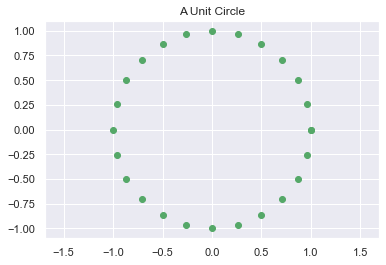

In [3]:
X = circle_points()
print('X:', X.shape)
print(X)
plot_circle(X,'A Unit Circle')

In [4]:
M = np.matrix([[2, 0],[0, 1]])
print('M'); print(M)

M
[[2 0]
 [0 1]]


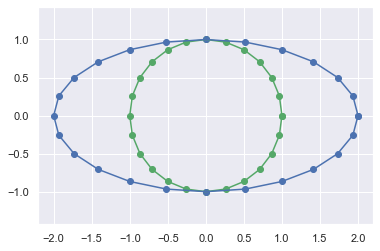

In [5]:
def plot_transformed_circle(X,NewX, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X[0].flat, X[1].flat, c='g')
    plt.scatter(NewX[0].flat, NewX[1].flat, c='b')
    plt.plot(X[0].flat, X[1].flat, color='g')
    plt.plot(NewX[0].flat, NewX[1].flat, color='b')
    if(title):
        plt.title(title)
    plt.axis('equal')
    plt.show() 
    
plot_transformed_circle(X,    # First show the original circle
                        M*X)  # Then show the transformed circle

M
[[2 0]
 [0 2]]


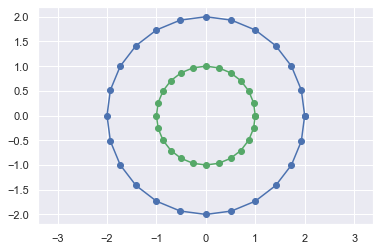

In [6]:
M = np.matrix([[2, 0],[0, 2]])
print('M'); print(M)
plot_transformed_circle(X,M*X)

M
[[1 2]
 [0 1]]


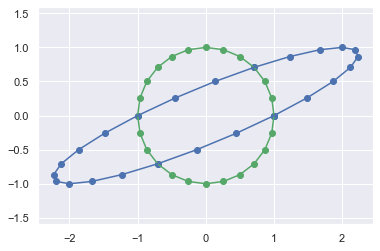

In [7]:
M = np.matrix([[1,2],[0, 1]])
print('M'); print(M)
plot_transformed_circle(X,M*X)

[[0.5 0.3]
 [0.4 0.8]]


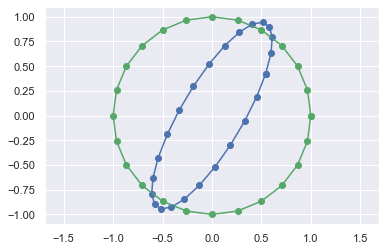

In [8]:
np.random.seed(100); np.set_printoptions(precision=1)
# Now just create a random 2x2 matrix
R = np.matrix(np.random.rand(2,2))
print(R)

# Then transform points by that matrix
NX = R*X
plot_transformed_circle(X,NX)

You can do this same thing to different dimensions of inputs, such as 1-D (lines):

X_line:
 [-1.  -0.8 -0.6 ...  0.6  0.8  1. ]
Transformed:
 [[-0.5 -0.4 -0.3 ...  0.3  0.4  0.5]
 [-0.4 -0.3 -0.2 ...  0.2  0.3  0.4]]


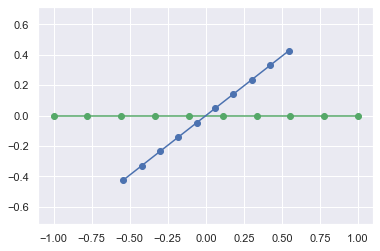

In [9]:
X_line = np.linspace(-1,1,10)  # Just create a 1-D set of points
print("X_line:\n",X_line)
R[:,0]*X_line   # Convert it into 
print("Transformed:\n",R[:,0]*X_line)
plot_transformed_circle(np.vstack([X_line,np.zeros_like(X_line)]),
                        R[:,0]*X_line)


# [The Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)
For $N$ data points of $d$ dimensions:
$$
X_{d\times N} = U_{d\times d}  \Sigma_{d\times N} V^*_{N\times N}
$$
Where $U$, $V$ are [orthogonal](https://en.wikipedia.org/wiki/Orthogonal_matrix) ($UU^T=I$), and $\Sigma$ is diagonal.

In [10]:
NX

matrix([[ 0.5,  0.6,  0.6, ...,  0.3,  0.5,  0.5],
        [ 0.4,  0.6,  0.8, ..., -0.1,  0.2,  0.4]])

In [11]:
U,s,V = np.linalg.svd(NX,full_matrices=False) # Why is this useful?
S = np.diag(s)
print('U:', U.shape)
print('S:', S.shape) # Why is this only 2x2, rather than 2x25?
print('V:', V.shape) # Why is this only 2x25, rather than 25x25?
print('S ='); print(S)
print('U*U.T ='); print(U*U.T)

U: (2, 2)
S: (2, 2)
V: (2, 25)
S =
[[3.8 0. ]
 [0.  1.1]]
U*U.T =
[[1. 0.]
 [0. 1.]]


In [12]:
V

matrix([[-0.2, -0.2, -0.3, ..., -0. , -0.1, -0.2],
        [ 0.2,  0.2,  0.1, ...,  0.3,  0.3,  0.2]])

S =
[[3.8 0. ]
 [0.  1.1]]


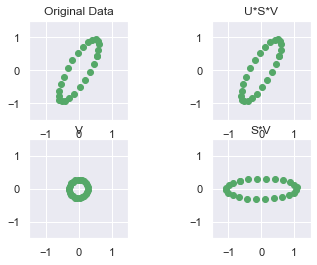

In [13]:
print('S ='); print(S)

# Allow me to plot multiple circles on one figure
def plot_ax(ax,X,title=None):
    ax.scatter(X[0].flat, X[1].flat,c='g')
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    if(title):
        plt.title(title)   

fig = plt.figure()
plot_ax(fig.add_subplot(221, aspect='equal'),    NX, 'Original Data')
plot_ax(fig.add_subplot(223, aspect='equal'),     V, 'V')
plot_ax(fig.add_subplot(224, aspect='equal'),   S*V, 'S*V')
plot_ax(fig.add_subplot(222, aspect='equal'), U*S*V, 'U*S*V')
plt.show() # Essentially a "Change of Basis"
# U and V are orthogonal matrices, so they just represent Rotations/Reflections

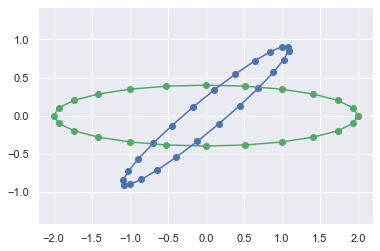

In [14]:
Y = circle_points(2,2/5) # Create points on a different ellipse
NY = R*Y  # Transform those points with a matrix
plot_transformed_circle(Y,NY)

S =
[[5.1 0. ]
 [0.  0.7]]


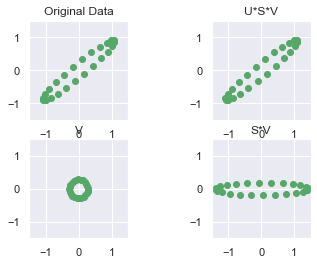

In [15]:
# Do the SVD
U,s,V = np.linalg.svd(NY,full_matrices=False)
S = np.diag(s); print('S ='); print(S)

# Plot the data and the various SVD transformations
fig = plt.figure()
plot_ax(fig.add_subplot(221, aspect='equal'),    NY, 'Original Data')
plot_ax(fig.add_subplot(223, aspect='equal'),     V, 'V')
plot_ax(fig.add_subplot(224, aspect='equal'),   S*V, 'S*V')
plot_ax(fig.add_subplot(222, aspect='equal'), U*S*V, 'U*S*V')
plt.show()

# What about different dimensions?

In [16]:
M = np.matrix([[1,0,],[0,1],[2,0.5]])
r = np.matrix([[1],[1]])
print('M = '); print(M)
print('r = '); print(r)    # What are the dimensions of r?
print('M*r ='); print(M*r) # What are the dimensions of M*r?

M = 
[[1.  0. ]
 [0.  1. ]
 [2.  0.5]]
r = 
[[1]
 [1]]
M*r =
[[1. ]
 [1. ]
 [2.5]]


In [17]:
# Let's plot the points in 3D 
def plot_3D_circle(X, elev=10., azim=50, title=None,c='b'):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = np.array(X[0].flat)
    y = np.array(X[1].flat)
    z = np.array(X[2].flat)
    ax.scatter(x,y,z,c=c)
    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(x.max()+x.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(y.max()+y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(z.max()+z.min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')
    
    ax.view_init(elev=elev, azim=azim)
    #plt.axis('equal')
    if(title):
        plt.title(title)
    plt.show()
    
def plot_3D_ax(ax, X, elev=10., azim=50, title=None,c='b'):
    x = np.array(X[0].flat)
    y = np.array(X[1].flat)
    z = np.array(X[2].flat)
    ax.scatter(x,y,z,c=c)
    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(x.max()+x.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(y.max()+y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(z.max()+z.min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')

In [18]:
M = np.matrix([[1,0,],[0,1],[2,0.5]])
interactive_3D = lambda e,a: plot_3D_circle(M*X,elev=e,azim=a)
interact(interactive_3D, e=(0,90,30), a = (0,360,30))

interactive(children=(IntSlider(value=30, description='e', max=90, step=30), IntSlider(value=180, description=…

<function __main__.<lambda>(e, a)>

In [22]:
M*X

matrix([[ 1. ,  1.5,  1.9, ..., -0.1,  0.4,  1. ],
        [-2. , -1.4, -0.7, ..., -2.7, -2.4, -2. ],
        [ 2. ,  2.1,  2. , ...,  1.5,  1.8,  2. ]])

In [23]:
M = np.matrix([[1,2],[-2,2],[2,0.5]])
print(M)

[[ 1.   2. ]
 [-2.   2. ]
 [ 2.   0.5]]


In [24]:
interactive_3D = lambda e,a: plot_3D_circle(M*Y,elev=e,azim=a)
interact(interactive_3D, e=(0,90,30), a = (0,360,30))

interactive(children=(IntSlider(value=30, description='e', max=90, step=30), IntSlider(value=180, description=…

<function __main__.<lambda>(e, a)>

In [25]:
# M*Y is a 3D set of points
U,s,V = np.linalg.svd(M*Y,full_matrices=False)
S = np.diag(s)
print('U:', U.shape)
print('S:', S.shape)
print('V:', V.shape)
print('S =')
print(S)

U: (3, 3)
S: (3, 3)
V: (3, 25)
S =
[[21.6  0.   0. ]
 [ 0.   4.   0. ]
 [ 0.   0.   0. ]]


In [27]:
U*S

matrix([[ -7.1,   2.9,  -0. ],
        [ 14.5,   2.5,   0. ],
        [-14.4,   1. ,   0. ]])

In [29]:
V

matrix([[-0.3, -0.3, -0.2, ..., -0.2, -0.3, -0.3],
        [ 0. ,  0.1,  0.1, ..., -0.1, -0.1,  0. ],
        [-0.8,  0.5,  0.1, ..., -0. ,  0.1,  0. ]])

Text(0.5, 1.0, 'Magnitude of Singular Values')

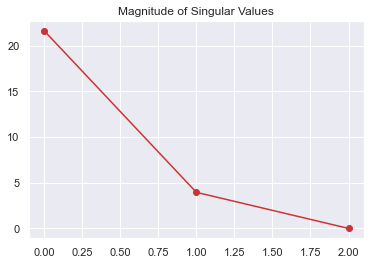

In [30]:
fig = plt.figure()
plt.plot(np.diag(S),'o-')
plt.title("Magnitude of Singular Values")

In [31]:
interactive_3D = lambda e,a: plot_3D_circle(V,elev=e,azim=a)
interact(interactive_3D, e=(0,90,30), a = (0,360,30))

interactive(children=(IntSlider(value=30, description='e', max=90, step=30), IntSlider(value=180, description=…

<function __main__.<lambda>(e, a)>

In [32]:
interactive_3D = lambda e,a: plot_3D_circle(S*V,elev=e,azim=a)
interact(interactive_3D, e=(0,90,30), a = (0,360,30))

interactive(children=(IntSlider(value=30, description='e', max=90, step=30), IntSlider(value=180, description=…

<function __main__.<lambda>(e, a)>

In [36]:
interactive_3D = lambda e,a: plot_3D_circle(U*S*V,elev=e,azim=a)
interact(interactive_3D, e=(0,90,30), a = (0,360,30))

interactive(children=(IntSlider(value=30, description='e', max=90, step=30), IntSlider(value=180, description=…

<function __main__.<lambda>(e, a)>

In [37]:
print('S ='); print(S)
print('V ='); print(V)
print('S*V ='); print(S*V)

S =
[[21.6  0.   0. ]
 [ 0.   4.   0. ]
 [ 0.   0.   0. ]]
V =
[[-0.3 -0.3 -0.2 ... -0.2 -0.3 -0.3]
 [ 0.   0.1  0.1 ... -0.1 -0.1  0. ]
 [-0.8  0.5  0.1 ... -0.   0.1  0. ]]
S*V =
[[-6.  -5.8 -5.1 ... -5.3 -5.8 -6. ]
 [ 0.   0.3  0.6 ... -0.5 -0.3  0. ]
 [-0.   0.   0.  ... -0.   0.   0. ]]


In [38]:
# So if V's 3rd row doesn't matter, why don't we just get rid of it?
Vt = V[0:2,:]
St = S[:,0:2]
print('St ='); print(St)
print('Vt ='); print(Vt)
print('St*Vt ='); print(St*Vt)

St =
[[21.6  0. ]
 [ 0.   4. ]
 [ 0.   0. ]]
Vt =
[[-0.3 -0.3 -0.2 ... -0.2 -0.3 -0.3]
 [ 0.   0.1  0.1 ... -0.1 -0.1  0. ]]
St*Vt =
[[-6.  -5.8 -5.1 ... -5.3 -5.8 -6. ]
 [ 0.   0.3  0.6 ... -0.5 -0.3  0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]


In [39]:
print('U ='); print(U)

U =
[[-0.3  0.7 -0.6]
 [ 0.7  0.6  0.4]
 [-0.7  0.3  0.7]]


In [40]:
# Truncate U. Now we have the "Truncated SVD"
Ut = U[:,0:2]
St = St[0:2,:]
print('Ut ='); print(Ut)
print('St ='); print(St)
print('Vt ='); print(Vt)

Ut =
[[-0.3  0.7]
 [ 0.7  0.6]
 [-0.7  0.3]]
St =
[[21.6  0. ]
 [ 0.   4. ]]
Vt =
[[-0.3 -0.3 -0.2 ... -0.2 -0.3 -0.3]
 [ 0.   0.1  0.1 ... -0.1 -0.1  0. ]]


In [41]:
print('Ut*St*Vt ='); print(Ut*St*Vt) # Even though we threw away info...
print('M*Y = '); print(M*Y)
print("Are they equal?: ", np.allclose(M*Y,Ut*St*Vt))

Ut*St*Vt =
[[ 2.   2.1  2.1 ...  1.3  1.7  2. ]
 [-4.  -3.7 -3.1 ... -3.9 -4.1 -4. ]
 [ 4.   3.9  3.6 ...  3.4  3.8  4. ]]
M*Y = 
[[ 2.   2.1  2.1 ...  1.3  1.7  2. ]
 [-4.  -3.7 -3.1 ... -3.9 -4.1 -4. ]
 [ 4.   3.9  3.6 ...  3.4  3.8  4. ]]
Are they equal?:  True


[[-0.3 -0.3 -0.2 ... -0.2 -0.3 -0.3]
 [ 0.   0.1  0.1 ... -0.1 -0.1  0. ]]


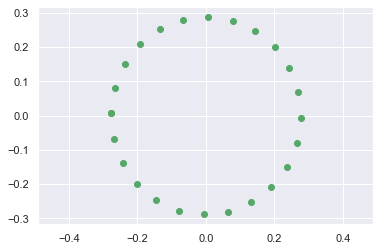

In [42]:
print(Vt)
plot_circle(Vt) # The actual basis which preserves data variability

In [43]:
# Let's make things more difficult - add some noise:
Z = M*X + np.random.normal(0,0.5,size=(M*X).shape)
interactive_3D = lambda e,a: plot_3D_circle(Z,elev=e,azim=a)
interact(interactive_3D, e=(0,90,30), a = (0,360,30))

interactive(children=(IntSlider(value=30, description='e', max=90, step=30), IntSlider(value=180, description=…

<function __main__.<lambda>(e, a)>

In [44]:
Ue,se,Ve = np.linalg.svd(Z,full_matrices=False)
Se = np.diag(se)
print('S ='); print(Se) # What is different, compared to no-noise?

S =
[[11.5  0.   0. ]
 [ 0.   9.7  0. ]
 [ 0.   0.   2.8]]


In [45]:
# Truncate:
Uet = Ue[:,0:2]
Set = Se[0:2,0:2]
Vet = Ve[0:2,:]
print(Z); print(); print(Uet*Set*Vet)

[[ 1.5  1.7  2.  ...  0.2  1.1  0.8]
 [-2.  -1.3 -1.5 ... -3.  -2.9 -2.4]
 [ 2.1  2.3  1.6 ...  1.9  1.1  2.3]]

[[ 1.3  1.7  1.5 ...  0.2  0.5  0.9]
 [-1.9 -1.3 -1.2 ... -3.  -2.5 -2.5]
 [ 2.3  2.3  2.  ...  1.9  1.9  2.2]]


In [46]:
print("Are they equal?: ", np.allclose(Z,Uet*Set*Vet)) # We lost info

Are they equal?:  False


In [47]:
x = np.arange(-.2,.3,.05)
y = np.arange(-.6,.6,.1)
vep = np.matrix(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))
Zt = Uet*Set*vep.T
#Zt = Uet*Set*Vet
def compare_3D(Z, Zt, elev=10., azim=50):
    fig = plt.figure()
    ax = Axes3D(fig)
    plot_3D_ax(ax,Zt,c='g')
    plot_3D_ax(ax,Z,c='b')
    ax.view_init(elev=elev, azim=azim)
    #ax.axis('equal')
    plt.show()

In [48]:
interactive_3D = lambda e,a: compare_3D(Z,Zt,elev=e,azim=a)
interact(interactive_3D, e=(0,90,30), a = (0,360,30))

interactive(children=(IntSlider(value=30, description='e', max=90, step=30), IntSlider(value=180, description=…

<function __main__.<lambda>(e, a)>

The idea of uncovering structure, or reducing data-dimensions is one key goal of Unsupervised Learning. In particular, the SVD (among other methods) can be used for [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis): reducing the number of dimensions of a data-set, by finding a linear transformation to a smaller orthogonal basis which minimizes reconstruction error to the original space.

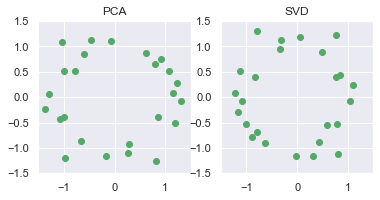

In [39]:
from sklearn.decomposition import PCA
pcaY = PCA(n_components=2).fit_transform(Z.T)
pcaY = np.matrix([[-.1,0],[0,-.1]])*pcaY.T # Some scaling/flipping
fig = plt.figure()
plot_ax(fig.add_subplot(121, aspect='equal'), 4*pcaY, 'PCA')
plot_ax(fig.add_subplot(122, aspect='equal'),  4*Vet, 'SVD')
plt.show()
# Note: result is (essentially) identical to PCA (up to scale/flipped axes)